# Pre-Processing and Training Data

## Remember

The purpose of this project is to build a predictive model for Economic index based on school demographics in NYC. This model will be used to provide guidance for NYC's education system plan and aim to decrease economic indexes by borough.








## The next step is to 

1. Load the data


2. Split the data 


3. Scale and ecode data if necessary


4. initiate the model 


5. Create the Pipeline


6. fit the pipeline


We are going to use PySpark Mlib

to train and prprocess our model.

We are also going to import the libraries we want to use first

In [590]:
import pyspark
from pyspark.sql import SparkSession
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Initiate Spark

In [591]:
nyc_data_model = pd.read_csv('../data/nyc_data_modeling.csv')

In [592]:
spark = SparkSession.builder.master("local[1]") \
                    .appName('SparkByExamples.com') \
                    .config("spark.driver.bindAddress", "127.0.0.1") \
                    .getOrCreate()


In [593]:
sc = spark.sparkContext
sc

<SparkContext master=local[1] appName=SparkByExamples.com>

In [594]:
#sc.stop()

In [595]:
print("Spark Version: {}".format(sc.version))

Spark Version: 3.3.1


In [596]:
print("Spark Version: {}".format(sc.pythonVer))

Spark Version: 3.9


In [597]:
print("Spark Version: {}".format(sc.master))

Spark Version: local[1]


# Load data

In [598]:
PATH = '../data/nyc_data_modeling.csv'

In [599]:
# Pandas

nyc_pandas = pd.read_csv(PATH).iloc[:,1:]

In [600]:
#Spark
nyc_spark = spark.read.csv(PATH, header=True, inferSchema=True)

PySpark makes no such inferences. By default, PySpark will treat the header as the first row and all columns as string variables. To prevent PySpark from making any false assumptions, the user must assign values to the header and inferSchema parameters.

In [601]:
nyc_pandas.head()

,Year,# Male,# Asian,# Black,# Hispanic,# Multi-Racial,# Native American,# White,# Missing Race/Ethnicity Data,# Students with Disabilities,# English Language Learners,Economic Need Index,Borough,District Number,Economic Support,Pre School,Elementary School,Middle School,High School
0,2016-17,95,14,51,105,3,1,4,0,51,12,88.2,Manhattan,1,Need Support,45,133,0,0
1,2017-18,91,20,52,110,1,1,6,0,49,8,89.0,Manhattan,1,Need Support,45,145,0,0
2,2018-19,89,24,48,95,0,1,6,0,39,8,88.8,Manhattan,1,Need Support,33,141,0,0
3,2019-20,96,27,56,96,0,2,9,0,46,17,86.7,Manhattan,1,Need Support,43,147,0,0
4,2020-21,92,26,53,102,1,0,11,0,43,21,85.6,Manhattan,1,Need Support,46,147,0,0


Since PySpark implements lazy execution, it requires a trigger that derives the results of any operation. In this case, the show function acts as the trigger, letting the user view the loaded dataset.

In [602]:
nyc_pandas.describe()

,# Male,# Asian,# Black,# Hispanic,# Multi-Racial,# Native American,# White,# Missing Race/Ethnicity Data,# Students with Disabilities,# English Language Learners,Economic Need Index,District Number,Pre School,Elementary School,Middle School,High School
count,9169.000000,9169.000000,9169.000000,9169.000000,9169.000000,9169.000000,9169.000000,9169.000000,9169.000000,9169.000000,9169.000000,9169.000000,9169.000000,9169.000000,9169.000000,9169.000000
mean,301.697241,95.272113,149.827898,239.106009,6.453594,6.534300,86.237321,2.524376,122.522303,80.493620,73.083172,27.062820,60.735304,220.988439,127.866834,176.365034
std,252.467601,217.404728,166.121062,223.101691,12.272638,14.409499,180.892501,8.999338,97.894632,106.569319,20.205806,26.072237,75.858914,260.187174,266.269458,467.812553
min,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,162.000000,5.000000,41.000000,90.000000,1.000000,1.000000,6.000000,0.000000,67.000000,18.000000,63.300000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,245.000000,17.000000,102.000000,181.000000,2.000000,3.000000,15.000000,0.000000,99.000000,44.000000,79.200000,19.000000,46.000000,153.000000,0.000000,0.000000
75%,359.000000,81.000000,192.000000,313.000000,7.000000,7.000000,78.000000,1.000000,146.000000,100.000000,88.600000,29.000000,104.000000,389.000000,187.000000,248.000000
max,3635.000000,3671.000000,1493.000000,2056.000000,181.000000,355.000000,3104.000000,234.000000,925.000000,1168.000000,95.000000,84.000000,1328.000000,1688.000000,2265.000000,6040.000000


In [603]:
nyc_spark.describe().show()

22/11/16 14:30:13 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , Year, # Male, # Asian, # Black, # Hispanic, # Multi-Racial, # Native American, # White, # Missing Race/Ethnicity Data, # Students with Disabilities, # English Language Learners, Economic Need Index, Borough, District Number, Economic Support, Pre School, Elementary School, Middle School, High School
 Schema: _c0, Year, # Male, # Asian, # Black, # Hispanic, # Multi-Racial, # Native American, # White, # Missing Race/Ethnicity Data, # Students with Disabilities, # English Language Learners, Economic Need Index, Borough, District Number, Economic Support, Pre School, Elementary School, Middle School, High School
Expected: _c0 but found: 
CSV file: file:///Users/taehyun/Dropbox/Springboard/NYC_Capstone_project/NewYorkCity_Education/data/nyc_data_modeling.csv
+-------+-----------------+-------+------------------+------------------+------------------+------------------+------------------+-----------

There is a random column in spark dataframe. Let's get rid of it.

In [604]:
nyc_spark = nyc_spark.drop('_c0')

We can also get rid of the categorical column economic support since we can directly predit the economic need index and deteremine which category it fits. 

In [605]:
nyc_spark = nyc_spark.drop('Economic Support')

In [606]:
print(nyc_spark.printSchema())

root
 |-- Year: string (nullable = true)
 |-- # Male: integer (nullable = true)
 |-- # Asian: integer (nullable = true)
 |-- # Black: integer (nullable = true)
 |-- # Hispanic: integer (nullable = true)
 |-- # Multi-Racial: integer (nullable = true)
 |-- # Native American: integer (nullable = true)
 |-- # White: integer (nullable = true)
 |-- # Missing Race/Ethnicity Data: integer (nullable = true)
 |-- # Students with Disabilities: integer (nullable = true)
 |-- # English Language Learners: integer (nullable = true)
 |-- Economic Need Index: double (nullable = true)
 |-- Borough: string (nullable = true)
 |-- District Number: integer (nullable = true)
 |-- Pre School: integer (nullable = true)
 |-- Elementary School: integer (nullable = true)
 |-- Middle School: integer (nullable = true)
 |-- High School: integer (nullable = true)

None


In [607]:
columns_to_drop = ['Economic Support']
nyc_spark = nyc_spark.drop(*columns_to_drop)
nyc_pandas = nyc_pandas.drop(['Economic Support'], axis=1)

### String Indexer -> OHEncode

In [608]:
from pyspark.ml.feature import OneHotEncoder
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StandardScaler

indexer = StringIndexer(inputCols = ['Borough','District Number','Year'], outputCols = ['Borough_label','District Number_label','Year_label'])
nyc_spark_index = indexer.fit(nyc_spark).transform(nyc_spark)

In [609]:
ohe_encoder = OneHotEncoder(inputCols = ['Borough_label','District Number_label','Year_label'], outputCols = ['Borough_ohe','District Number_ohe','Year_ohe'], dropLast = True)
ohe_encoder_index = ohe_encoder.fit(nyc_spark_index).transform(nyc_spark_index)

### Scale the Data

In [610]:
vec_assembler = VectorAssembler(inputCols = ['# Male', '# Asian', '# Black', '# Hispanic', '# Multi-Racial',
       '# Native American', '# White', '# Missing Race/Ethnicity Data',
       '# Students with Disabilities', '# English Language Learners', 'Pre School',
       'Elementary School', 'Middle School', 'High School','Borough_ohe','District Number_ohe','Year_ohe'], outputCol = 'feature')

vec_assemb = vec_assembler.transform(ohe_encoder_index)

In [611]:
scaler = StandardScaler(inputCol='feature', outputCol='feature_scaled', withMean=True, withStd=True)
vec_scaled_train = scaler.fit(vec_assemb).transform(vec_assemb)

## Split the data

In [612]:
(train_df, test_df) = vec_scaled_train.randomSplit([0.8, 0.2])

## Model 1. Linear Regression

The model I chose is linear Regression and I chose it since it is a classic regression model with linear algorithm. Simply all the calculation of the functions add up to the dependent variable.

I am going to use the following parameters and tune it.

1. elasticNetParam = 1.0
by setting it equal to 1.0, it means that it's lasso regression which is L1.

I chose L1 penalization over L2 because I have a lot of outliers in my data set. Since L1 takes the manhattan distance meaning it is penalizing the !absolute value! of the weights so it is more robust to outliers.

The down side of L1 would be the case when we have highly correlated features, the L1 norm would select only 1 of the features from the group of correlated features in an arbitrary nature so lasso regression also acts as a feature selector.

0.5 would be the mix of L1 and L2.

In general, Lasso regression (Linear Regression with L1 regularization) would produce a model that is highly interpretable, and only uses a subset of input features, thus reducing the complexity of the model.

2. MaxItr = 100,150,200,250
This has no reason. The higher the iteration, prone to overfit. 

3. regParam
This is unknown. We have to try multiple values


In [613]:
metric_list = []

In [614]:
from pyspark.ml.regression import LinearRegression

linear_regressor = LinearRegression(featuresCol = 'feature_scaled', labelCol = 'Economic Need Index')

## Tune the model now

In [615]:
# alpha = 0 - penalty L2
paramGrid = (ParamGridBuilder()
               .addGrid(linear_regressor.maxIter, [100,150,200,250])
               .addGrid(linear_regressor.elasticNetParam, [0.1,0.5,1.0])
               .addGrid(linear_regressor.regParam, [0.3,0.6,0.9])
               .build())

In [616]:
evaluator = RegressionEvaluator(labelCol="Economic Need Index",
                                predictionCol="prediction",
                                metricName="rmse")

regressorcv = CrossValidator(estimator = linear_regressor,
                            estimatorParamMaps = paramGrid,
                            evaluator = evaluator,
                            numFolds = 5)

linear_regression_cv = regressorcv.fit(train_df)

## Evaluate¶

In [617]:
lr_regressor_predictions = linear_regression_cv.transform(test_df)
print('RMSE:', evaluator.evaluate(lr_regressor_predictions))
metric_list.append(evaluator.evaluate(lr_regressor_predictions))

RMSE: 10.644606149925625


### Extra Notes about preprocessing

Sparks one hot encoder: have to convert String to index and then convert again to one hot encode.

sklearns one hot encoder: converts directly to index from String

so basically, the above solution is splitting the data after encoding and scaling and the bottom solution is I split the data first and encoded. According to the evaluation metrics, the score doesn't have a difference at all. Therefore, I prefer using the top method which contains less code. 

Steps:
Encode -> Scale(Normalize) -> Split -> Model -> Evaluate

### Encoding

In [618]:
#from pyspark.ml.feature import OneHotEncoder
#from pyspark.ml.feature import StringIndexer
#from pyspark.ml.feature import VectorAssembler
#from pyspark.ml.feature import StandardScaler

#indexer = StringIndexer(inputCols = ['Borough','District Number','Year'], outputCols = ['Borough_label','District Number_label','Year_label'])
#label_df_train = indexer.fit(train_df).transform(train_df)
#label_df_test = indexer.fit(test_df).transform(test_df)

In [619]:
#ohe_encoder = OneHotEncoder(inputCols = ['Borough_label','District Number_label','Year_label'], outputCols = ['Borough_ohe','District Number_ohe','Year_ohe'], dropLast = True)
#encoding_df_train = ohe_encoder.fit(label_df_train).transform(label_df_train)
#encoding_df_test = ohe_encoder.fit(label_df_test).transform(label_df_test)

### Scaling

In spark, when we scale, we have to perform vectorAssembler to perform Feature Vectorization meaning all the columns should be vectorized. 

In [620]:
#vec_assembler = VectorAssembler(inputCols = ['# Male', '# Asian', '# Black', '# Hispanic', '# Multi-Racial',
       #'# Native American', '# White', '# Missing Race/Ethnicity Data',
       #'# Students with Disabilities', '# English Language Learners', 'Pre School',
       #'Elementary School', 'Middle School', 'High School','Borough_ohe','District Number_ohe','Year_ohe'], outputCol = 'feature')

#vec_assemb_train = vec_assembler.transform(encoding_df_train)
#vec_assemb_test = vec_assembler.transform(encoding_df_test)

In [621]:
#scaler = StandardScaler(inputCol='feature', outputCol='feature_scaled', withMean=True, withStd=True)
#vec_scaled_train = scaler.fit(vec_assemb).transform(vec_assemb_train)
#vec_scaled_test = scaler.fit(vec_assemb).transform(vec_assemb_test)

### Create Model

In [622]:
#from pyspark.ml.regression import LinearRegression

#regressor = LinearRegression(featuresCol = 'feature_scaled', labelCol = 'Economic Need Index')

In [623]:
#linear_model = regressor.fit(vec_scaled_train)

In [624]:
#print("Coefficients: " + str(linear_model.coefficients))
#print("\nIntercept: " + str(linear_model.intercept))
#trainSummary = linear_model.summary
#print("RMSE: %f" % trainSummary.rootMeanSquaredError)
#print("\nr2: %f" % trainSummary.r2)

In [625]:
#pred = linear_model.evaluate(vec_scaled_test)
#pred.predictions.toPandas().iloc[:,10:].head()

In [626]:
#print('‘MAE for test set:’', pred.meanAbsoluteError)
#print('MSE for test set:', pred.meanSquaredError)
#print('RMSE for test set:', pred.rootMeanSquaredError)
#print('R2-Score for test set:', pred.r2)

### Model 2: Decision tree Regression

I chose Decision tree Regression because it is

In [627]:
from pyspark.ml.regression import DecisionTreeRegressor
from pyspark.ml.evaluation import RegressionEvaluator

regressor = DecisionTreeRegressor(featuresCol = 'feature_scaled', labelCol = 'Economic Need Index')

## Binning feature values

Increasing maxBins allows the algorithm to consider more split candidates and make fine-grained split decisions. However, it also increases computation and communication.

Note that the maxBins parameter must be at least the maximum number of categories M for any categorical feature.

### Max depth

Increasing the depth leads to overfitting since it increases its complexity. 

## Tuning the model

In [628]:
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
paramGrid = (ParamGridBuilder()
               .addGrid(regressor.maxDepth, [2,5,10,2,30])
               .addGrid(regressor.maxBins, [10,20,40,80,100])
               .build())

### Evaluation

In [629]:
evaluator = RegressionEvaluator(labelCol="Economic Need Index",
                                predictionCol="prediction",
                                metricName="rmse")

regressorcv = CrossValidator(estimator = regressor,
                            estimatorParamMaps = paramGrid,
                            evaluator = evaluator,
                            numFolds = 5)


In [630]:
tree_regressor_model = regressorcv.fit(train_df)

22/11/16 14:31:23 WARN DAGScheduler: Broadcasting large task binary with size 1041.2 KiB
22/11/16 14:31:23 WARN DAGScheduler: Broadcasting large task binary with size 1159.5 KiB
22/11/16 14:31:24 WARN DAGScheduler: Broadcasting large task binary with size 1265.0 KiB
22/11/16 14:31:24 WARN DAGScheduler: Broadcasting large task binary with size 1354.4 KiB
22/11/16 14:31:24 WARN DAGScheduler: Broadcasting large task binary with size 1434.3 KiB
22/11/16 14:31:24 WARN DAGScheduler: Broadcasting large task binary with size 1502.8 KiB
22/11/16 14:31:25 WARN DAGScheduler: Broadcasting large task binary with size 1561.0 KiB
22/11/16 14:31:25 WARN DAGScheduler: Broadcasting large task binary with size 1608.6 KiB
22/11/16 14:31:25 WARN DAGScheduler: Broadcasting large task binary with size 1648.2 KiB
22/11/16 14:31:25 WARN DAGScheduler: Broadcasting large task binary with size 1676.1 KiB
22/11/16 14:31:25 WARN DAGScheduler: Broadcasting large task binary with size 1694.7 KiB
22/11/16 14:31:26 WAR

22/11/16 14:31:51 WARN DAGScheduler: Broadcasting large task binary with size 1043.7 KiB
22/11/16 14:31:52 WARN DAGScheduler: Broadcasting large task binary with size 1166.3 KiB
22/11/16 14:31:52 WARN DAGScheduler: Broadcasting large task binary with size 1267.0 KiB
22/11/16 14:31:53 WARN DAGScheduler: Broadcasting large task binary with size 1354.5 KiB
22/11/16 14:31:53 WARN DAGScheduler: Broadcasting large task binary with size 1424.9 KiB
22/11/16 14:31:54 WARN DAGScheduler: Broadcasting large task binary with size 1483.2 KiB
22/11/16 14:31:54 WARN DAGScheduler: Broadcasting large task binary with size 1533.6 KiB
22/11/16 14:31:54 WARN DAGScheduler: Broadcasting large task binary with size 1579.0 KiB
22/11/16 14:31:55 WARN DAGScheduler: Broadcasting large task binary with size 1618.4 KiB
22/11/16 14:31:55 WARN DAGScheduler: Broadcasting large task binary with size 1649.8 KiB
22/11/16 14:31:55 WARN DAGScheduler: Broadcasting large task binary with size 1678.0 KiB
22/11/16 14:31:55 WAR

22/11/16 14:34:25 WARN DAGScheduler: Broadcasting large task binary with size 1001.7 KiB
22/11/16 14:34:26 WARN DAGScheduler: Broadcasting large task binary with size 1119.0 KiB
22/11/16 14:34:27 WARN DAGScheduler: Broadcasting large task binary with size 1227.3 KiB
22/11/16 14:34:27 WARN DAGScheduler: Broadcasting large task binary with size 1324.4 KiB
22/11/16 14:34:28 WARN DAGScheduler: Broadcasting large task binary with size 1412.1 KiB
22/11/16 14:34:28 WARN DAGScheduler: Broadcasting large task binary with size 1484.6 KiB
22/11/16 14:34:29 WARN DAGScheduler: Broadcasting large task binary with size 1541.8 KiB
22/11/16 14:34:29 WARN DAGScheduler: Broadcasting large task binary with size 1584.8 KiB
22/11/16 14:34:30 WARN DAGScheduler: Broadcasting large task binary with size 1624.1 KiB
22/11/16 14:34:30 WARN DAGScheduler: Broadcasting large task binary with size 1656.3 KiB
22/11/16 14:34:30 WARN DAGScheduler: Broadcasting large task binary with size 1681.0 KiB
22/11/16 14:34:30 WAR

22/11/16 14:35:18 WARN DAGScheduler: Broadcasting large task binary with size 1101.1 KiB


22/11/16 14:35:19 WARN DAGScheduler: Broadcasting large task binary with size 1236.4 KiB
22/11/16 14:35:20 WARN DAGScheduler: Broadcasting large task binary with size 1347.9 KiB
22/11/16 14:35:20 WARN DAGScheduler: Broadcasting large task binary with size 1437.3 KiB
22/11/16 14:35:21 WARN DAGScheduler: Broadcasting large task binary with size 1506.6 KiB
22/11/16 14:35:21 WARN DAGScheduler: Broadcasting large task binary with size 1556.0 KiB
22/11/16 14:35:21 WARN DAGScheduler: Broadcasting large task binary with size 1597.1 KiB
22/11/16 14:35:22 WARN DAGScheduler: Broadcasting large task binary with size 1627.7 KiB
22/11/16 14:35:22 WARN DAGScheduler: Broadcasting large task binary with size 1653.9 KiB
22/11/16 14:35:22 WARN DAGScheduler: Broadcasting large task binary with size 1672.6 KiB
22/11/16 14:35:22 WARN DAGScheduler: Broadcasting large task binary with size 1688.2 KiB
22/11/16 14:35:23 WARN DAGScheduler: Broadcasting large task binary with size 1700.7 KiB
22/11/16 14:35:23 WAR

In [631]:
regressor_predictions = tree_regressor_model.transform(test_df)
print('RMSE:', evaluator.evaluate(regressor_predictions))
metric_list.append(evaluator.evaluate(regressor_predictions))

RMSE: 8.462658778131233


## Model 3: Multilayer Perceptron

I am going to be using Keras for this. The reaason why i chose this model is to try out with the multi layer regression

This model is used for accuracy purposes sacrificing speed compared to the two above models. Since it performs better in large data than the normal linear regression and decision tree regressor, I will be using it. 

In [632]:
x = nyc_pandas.drop(['Economic Need Index'],axis=1)
y = nyc_pandas['Economic Need Index']

### Split the data

In [633]:
x_train, x_val, y_train, y_val = train_test_split(x,y, test_size = 0.2, random_state= 42)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state= 42)

### Encode

In [634]:
from sklearn.model_selection import train_test_split
import category_encoders as e
encoder = e.BinaryEncoder(cols = ['Year','Borough','District Number'])
encoded_x_train = encoder.fit_transform(x_train[['Year','Borough','District Number']])
x_train_encoded = pd.concat([x_train, encoded_x_train],axis=1)
x_train_encoded.drop(['Year','Borough','District Number'], axis=1,inplace=True)
x_train_encoded.head()

,# Male,# Asian,# Black,# Hispanic,# Multi-Racial,# Native American,# White,# Missing Race/Ethnicity Data,# Students with Disabilities,# English Language Learners,...,Year_2,Borough_0,Borough_1,Borough_2,District Number_0,District Number_1,District Number_2,District Number_3,District Number_4,District Number_5
2358,291,5,174,384,0,8,4,0,176,97,...,1,0,0,1,0,0,0,0,0,1
4827,1880,1234,321,1083,11,16,537,12,461,1069,...,0,0,1,0,0,0,0,0,1,0
5764,429,667,8,105,15,2,12,0,99,308,...,1,0,1,1,0,0,0,0,1,1
2107,208,33,106,309,0,1,10,4,106,30,...,1,0,0,1,0,0,0,1,0,0
7371,411,293,53,132,7,5,295,0,176,41,...,1,1,0,0,0,0,0,1,0,1


In [635]:
encoded_x_test = encoder.fit_transform(x_test[['Year','Borough','District Number']])
x_test_encoded = pd.concat([x_test, encoded_x_test],axis=1)
x_test_encoded.drop(['Year','Borough','District Number'], axis=1,inplace=True)
x_test_encoded.head()

,# Male,# Asian,# Black,# Hispanic,# Multi-Racial,# Native American,# White,# Missing Race/Ethnicity Data,# Students with Disabilities,# English Language Learners,...,Year_2,Borough_0,Borough_1,Borough_2,District Number_0,District Number_1,District Number_2,District Number_3,District Number_4,District Number_5
5701,716,887,17,420,14,3,84,0,171,338,...,1,0,0,1,0,0,0,0,0,1
5489,383,64,13,639,2,2,52,0,225,177,...,0,0,0,1,0,0,0,0,1,0
7773,34,9,9,22,0,5,20,0,49,2,...,1,0,1,0,0,0,0,0,1,1
8205,193,27,270,42,3,8,6,4,44,18,...,1,0,1,1,0,0,0,1,0,0
1650,135,0,65,172,0,1,4,0,73,18,...,0,1,0,0,0,0,0,1,0,1


In [636]:
encoded_x_val = encoder.fit_transform(x_val[['Year','Borough','District Number']])
x_val_encoded = pd.concat([x_val, encoded_x_test],axis=1)
x_val_encoded.drop(['Year','Borough','District Number'], axis=1,inplace=True)
x_val_encoded.head()

,# Male,# Asian,# Black,# Hispanic,# Multi-Racial,# Native American,# White,# Missing Race/Ethnicity Data,# Students with Disabilities,# English Language Learners,...,Year_2,Borough_0,Borough_1,Borough_2,District Number_0,District Number_1,District Number_2,District Number_3,District Number_4,District Number_5
5701,716,887,17,420,14,3,84,0,171,338,...,1,0,0,1,0,0,0,0,0,1
5489,383,64,13,639,2,2,52,0,225,177,...,0,0,0,1,0,0,0,0,1,0
7773,34,9,9,22,0,5,20,0,49,2,...,1,0,1,0,0,0,0,0,1,1
8205,193,27,270,42,3,8,6,4,44,18,...,1,0,1,1,0,0,0,1,0,0
1650,135,0,65,172,0,1,4,0,73,18,...,0,1,0,0,0,0,0,1,0,1


### Scale

In [637]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train_encoded)
x_test_scaled = sc.fit_transform(x_test_encoded)
x_val_scaled = sc.fit_transform(x_val_encoded)

In [638]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns = x_train_encoded.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns = x_train_encoded.columns)
x_val_scaled = pd.DataFrame(x_val_scaled, columns = x_train_encoded.columns)

In [639]:
import keras
import keras.utils
from keras import utils as np_utils
import tensorflow as tf
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

model = keras.models.Sequential([
    keras.layers.Dense(30, activation = 'relu', input_shape = x_train_scaled.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss = 'mean_absolute_error', optimizer = 'sgd', metrics=[tf.keras.metrics.RootMeanSquaredError()])
history = model.fit(x_train_scaled,y_train, batch_size = 64, epochs= 50, validation_data=(x_val_scaled, y_val))

Epoch 1/50
115/115 [==============================] - 1s 3ms/step - loss: 67.9681 - root_mean_squared_error: 71.0259 - val_loss: 62.0605 - val_root_mean_squared_error: 65.3350
Epoch 2/50
115/115 [==============================] - 0s 2ms/step - loss: 42.2413 - root_mean_squared_error: 47.6578 - val_loss: 18.6038 - val_root_mean_squared_error: 21.8583
Epoch 3/50
115/115 [==============================] - 0s 2ms/step - loss: 10.8483 - root_mean_squared_error: 14.7563 - val_loss: 10.3212 - val_root_mean_squared_error: 13.5434
Epoch 4/50
115/115 [==============================] - 0s 2ms/step - loss: 8.4686 - root_mean_squared_error: 11.9197 - val_loss: 10.2322 - val_root_mean_squared_error: 13.3291
Epoch 5/50
115/115 [==============================] - 0s 2ms/step - loss: 7.7602 - root_mean_squared_error: 10.9107 - val_loss: 10.3998 - val_root_mean_squared_error: 13.5300
Epoch 6/50
115/115 [==============================] - 0s 2ms/step - loss: 7.3711 - root_mean_squared_error: 10.3404 - val_

In [640]:
history.history.keys()

dict_keys(['loss', 'root_mean_squared_error', 'val_loss', 'val_root_mean_squared_error'])

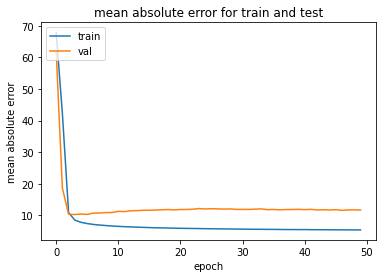

In [641]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('mean absolute error for train and test')
plt.ylabel('mean absolute error')
plt.xlabel('epoch')
plt.legend(['train','val'], loc = 'upper left')
plt.show()

I can see that my model is over fitting. 

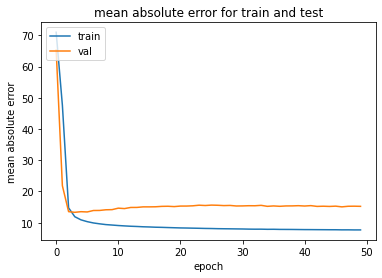

In [642]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('mean absolute error for train and test')
plt.ylabel('mean absolute error')
plt.xlabel('epoch')
plt.legend(['train','val'], loc = 'upper left')
plt.show()

The model is overfitting

I chose the activatioon function ReLU in the hidden layer. It is a commonly used activation function where if the input x is negative, then a value 0 is returned. 

We can penalize high errors with RMSE so we use rmse.

By analysis, we find that compared with ADAM, SGD is more locally unstable and is more likely to converge to the minima at the flat or asymmetric basins/valleys which often have better generalization performance over other type minima. So our results can explain the better generalization performance of SGD over ADAM. SO i didnt use adams

Source: https://machinelearningmastery.com/choose-an-activation-function-for-deep-learning/

In [643]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# getting the metrics

def metrics_for_mlp():
    y_pred = model.predict(x_test_scaled).ravel()
    rmse = mean_squared_error(y_test, y_pred, squared = False)
    return rmse

In [644]:
metrics_for_mlp()

58/58 [==============================] - 0s 1ms/step


15.244735546180092

In [647]:
metric_list.append(round(15.244735546180092,2))

In [654]:
result_df = pd.DataFrame(metric_list, index = ['Lasso Regression','Decision Tree Regressor','Multilayer Perceptron'], columns = ['Root Mean Square Error'])
result_df

,Root Mean Square Error
Lasso Regression,10.644606
Decision Tree Regressor,8.462659
Multilayer Perceptron,15.240000


### Choosing the right model.

Decision Tree Regressor is the best model. We can make further predictions with this model. 

In [659]:
regressor_predictions.select('Economic Need Index','prediction').show()

+-------------------+-----------------+
|Economic Need Index|       prediction|
+-------------------+-----------------+
|               72.2|87.78229166666664|
|               81.5|85.95297029702971|
|               83.1|87.04999999999998|
|               42.6|65.61724137931034|
|               68.4|81.40434782608699|
|               60.3|70.52857142857142|
|               87.9|91.20856832971799|
|               73.0|81.95116279069767|
|               63.7|            77.03|
|               81.0|85.95297029702971|
|               66.7|             70.5|
|               55.2|             50.1|
|               54.0|80.06818181818183|
|               88.1|91.20856832971799|
|               82.6|85.95297029702971|
|               78.3|87.78229166666664|
|               82.1|85.95297029702971|
|               68.6|55.74545454545455|
|               64.9|81.40434782608699|
|               91.3|88.15618279569892|
+-------------------+-----------------+
only showing top 20 rows



Even if we just briefly see the economic need index and the prediction, the values are roughly similiar to each other.

We can predict the economic need index by borough, year and a lot of other factors. Also, I can consider this Decision Tree Regressor a good model because the RSME is low